### 이차원 데이터

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/ch2_scores_em.csv', index_col='student number')

In [5]:
en_scores = np.array(df['english'])[:10]
ma_scores = np.array(df['mathematics'])[:10]

scores_df = pd.DataFrame({'english':en_scores,
                          'mathematics':ma_scores},
                         index=pd.Index(['A', 'B', 'C', 'D', 'E',
                                         'F', 'G', 'H', 'I', 'J'], name='student'))
scores_df

,english,mathematics
student,,
A,42,65
B,69,80
C,56,63
D,41,63
E,57,76
F,48,60
G,65,81
H,49,66
I,65,78


In [6]:
summary_df = scores_df.copy()
summary_df['english_deviation'] = summary_df['english'] - summary_df['english'].mean()
summary_df['mathematics_deviation'] = summary_df['mathematics'] - summary_df['mathematics'].mean()
summary_df['product of deviation'] = summary_df['english_deviation'] * summary_df['mathematics_deviation']
summary_df

,english,mathematics,english_deviation,mathematics_deviation,product of deviation
student,,,,,
A,42,65,-13.0,-6.4,83.2
B,69,80,14.0,8.6,120.4
C,56,63,1.0,-8.4,-8.4
D,41,63,-14.0,-8.4,117.6
E,57,76,2.0,4.6,9.2
F,48,60,-7.0,-11.4,79.8
G,65,81,10.0,9.6,96.0
H,49,66,-6.0,-5.4,32.4
I,65,78,10.0,6.6,66.0


In [7]:
summary_df['product of deviation'].mean()

np.float64(62.8)

In [9]:
# 공분산
cov_mat = np.cov(en_scores, ma_scores, ddof=0)
print(cov_mat)

cov_mat[0,1], cov_mat[1,0]

[[86.   62.8 ]
 [62.8  68.44]]


(np.float64(62.800000000000004), np.float64(62.800000000000004))

In [10]:
# 상관계수
np.cov(en_scores, ma_scores, ddof=0)[0,1] / (np.std(en_scores)*np.std(ma_scores))

np.float64(0.8185692341186713)

In [11]:
np.corrcoef(en_scores, ma_scores)

array([[1.        , 0.81856923],
       [0.81856923, 1.        ]])

In [12]:
scores_df.corr()

,english,mathematics
english,1.000000,0.818569
mathematics,0.818569,1.000000


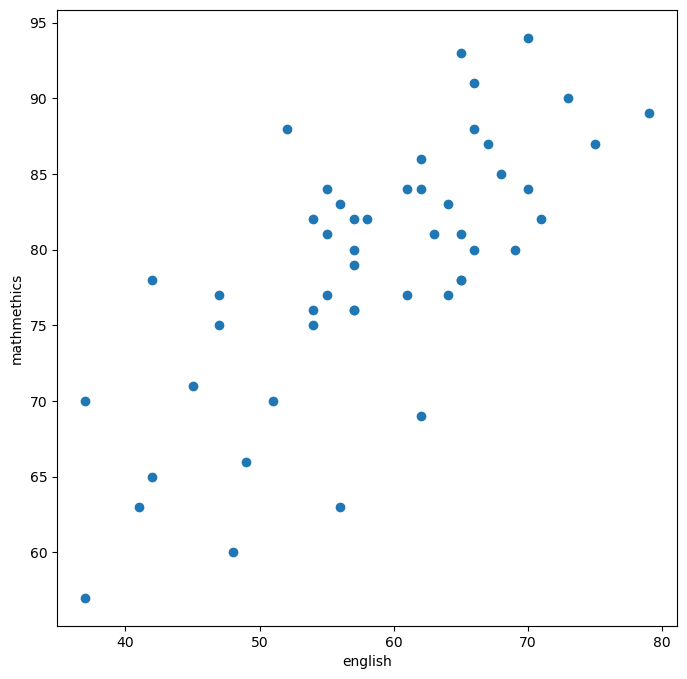

In [13]:
# 산점도
english_scores = np.array(df['english'])
math_scores = np.array(df['mathematics'])

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)

ax.scatter(english_scores, math_scores)
ax.set_xlabel('english')
ax.set_ylabel('mathmethics')

plt.show()

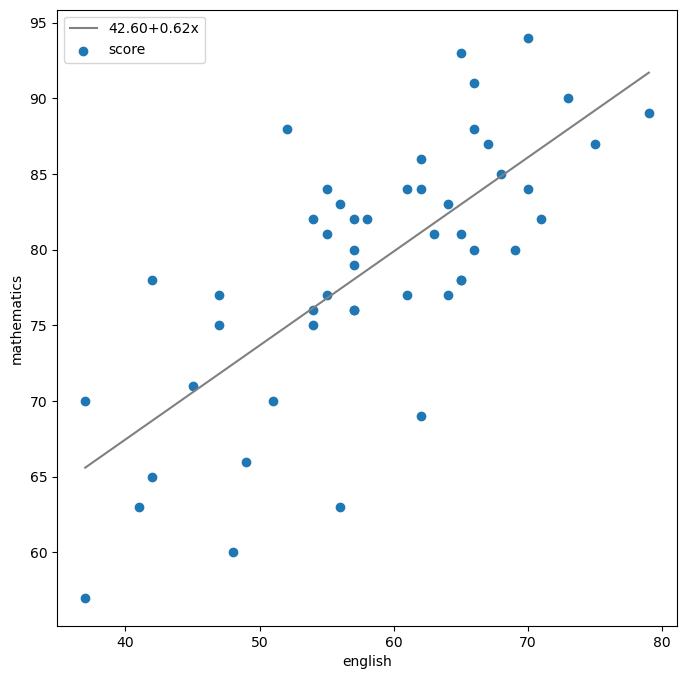

In [15]:
# 회귀직선: 산점도에서 경향?을 보기 위해? 그리는 직선
poly_fit = np.polyfit(english_scores, math_scores, 1)
poly_1d = np.poly1d(poly_fit)

xs = np.linspace(english_scores.min(), english_scores.max())
ys = poly_1d(xs)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1)
ax.plot(xs, ys, color='gray', label=f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x')
ax.scatter(english_scores, math_scores, label='score')
ax.set_xlabel('english')
ax.set_ylabel('mathematics')
ax.legend(loc='upper left')

plt.show()

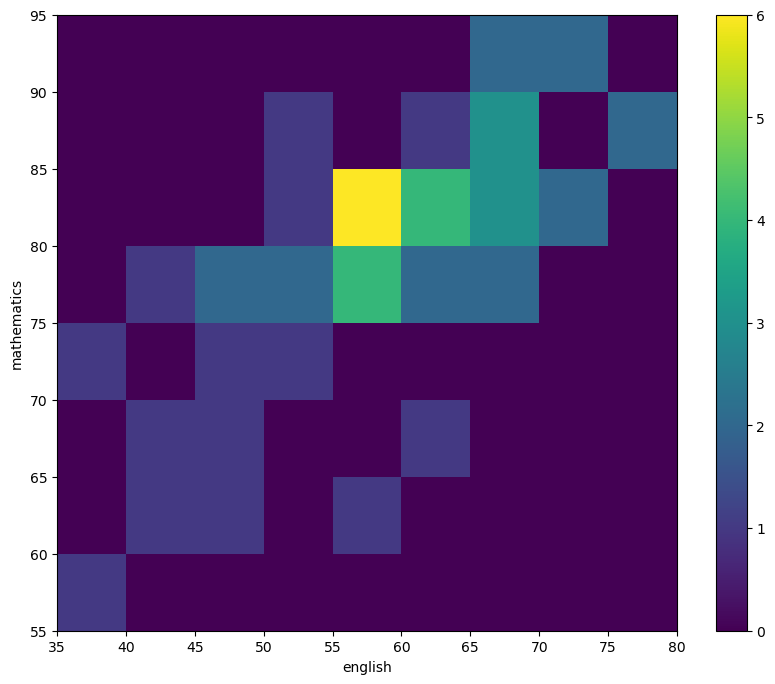

In [17]:
# 히트맵
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(1, 1, 1)

c = ax.hist2d(english_scores, math_scores, bins=[9,8], range=[(35,80), (55,95)])

ax.set_xlabel('english')
ax.set_ylabel('mathematics')
ax.set_xticks(c[1])
ax.set_yticks(c[2])
fig.colorbar(c[3], ax=ax)
plt.show()